In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import trend_visuals

In [25]:
data = pd.read_csv('/Users/cyrusachtari/Desktop/UBS-ZebraByte/data/skylab_instagram_datathon_dataset.csv', delimiter=';')

In [26]:
trends_brand, trends_all = trend_visuals.brand_level_trends(data, 'Versace')

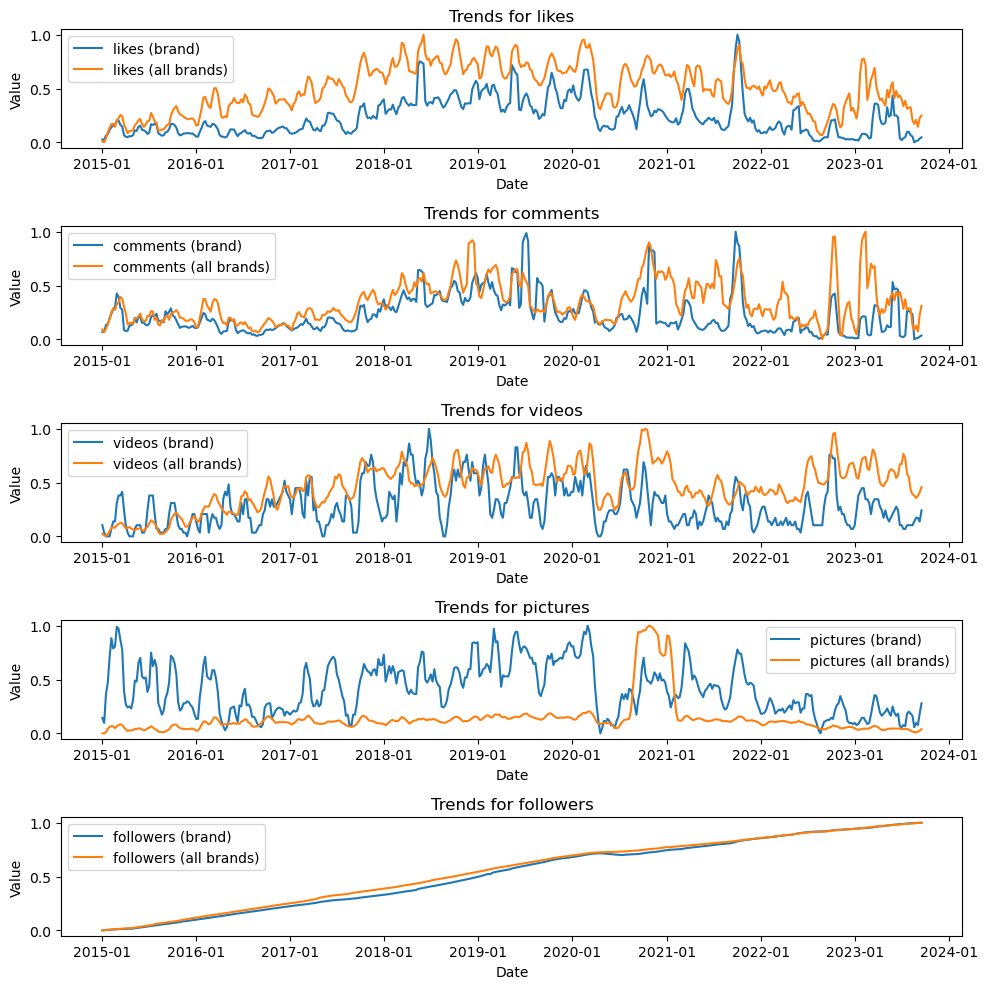

In [27]:
trend_visuals.plot_metrics_individual(trends_brand, trends_all)

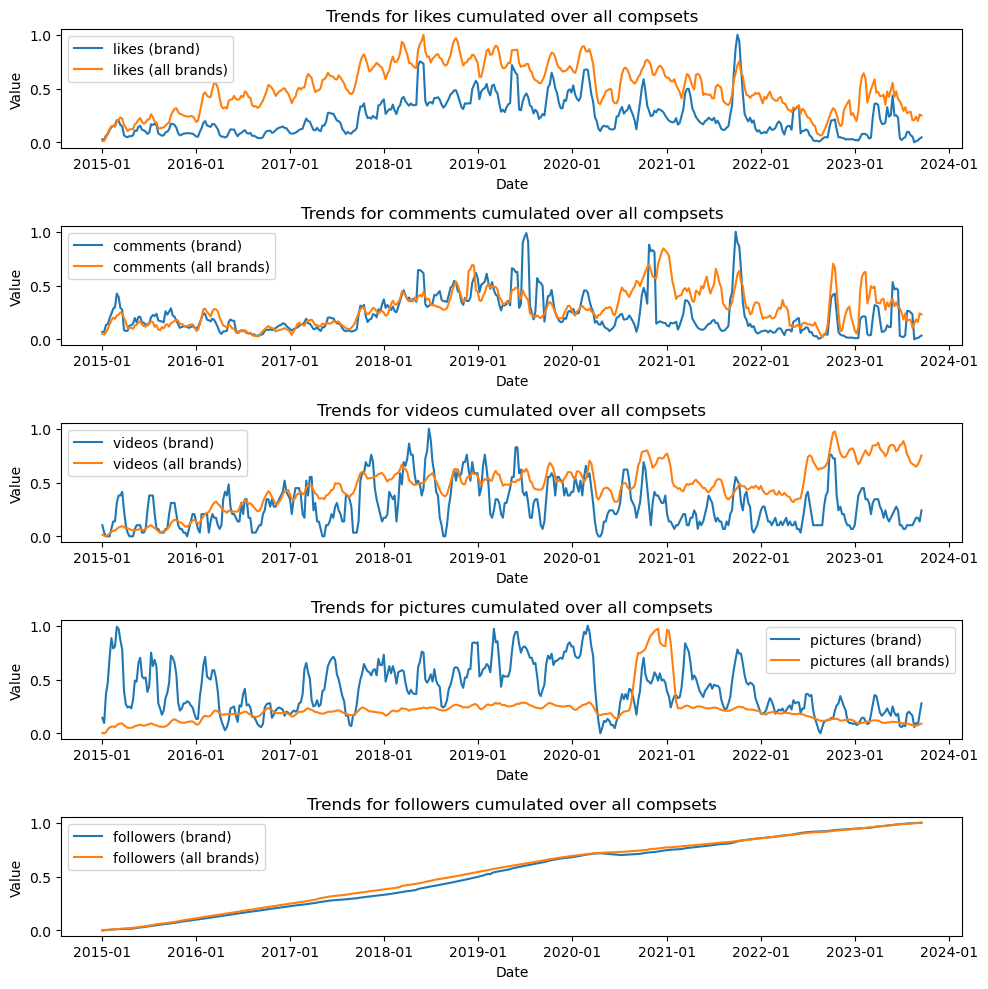

In [28]:
trend_visuals.plot_metrics_total(trends_brand, trends_all)